# Part I - Loan Data
## by Vicente Peña y Lillo

## Introduction
The dataset contains 113,937 loans with 81 variables, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
loans = pd.read_csv('prosperLoanData.csv')
print(loans.shape)
print(loans.dtypes)
print(loans.sample(5))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                     ListingKey  ListingNumber            ListingCreationDate  \
54488   66273578772547480F71787         777980  2013-05-14 08:46:52.903000000   
59916   5ECF33977588388743589D1         195422  2007-08-31 06:23:01.137000000   
108524  234035983882904108AFF39        1081657  2014-01-03 15:09:32.483000000   
31993   98DC3586160266088445C26         873399  2013-08-19 09:01:45.633000000   
70056   EE163527456816990CB2B55         530468  2011-10-03 08:47:43.533000000   

       CreditGrade  Term LoanStatus          

In [3]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

The dataset contains information from 113937 loans with 81 features, most of them numeric. Some of this features were created after July 2009, like `EstimatedReturn` and `ProsperRating`. Te last one correspond to one of the most important which is the risk asosited to the prosper and its a categorical, ordinal data.

### What is/are the main feature(s) of interest in your dataset?

The most import thing is to determine wether the loan will be paid.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Its expected that the `ProsperScore` or risk of each loan will be related to the `Term`, `BorrowerRate`,`ListingCategory (numeric)`, `EmploymnetStatus`, `EmploymnetStatusDuration`, `BorrowerState`, `Occupation`, `IncomeRange`, `IncomeVerifiable`, `TotalProsperPaymentsBilled`, `OnTimeProsperPayments`.

## Univariate Exploration

### Dataframe Correction

In [5]:
# Copying and cutting the variables of interest

loans.ListingCreationDate = pd.to_datetime(loans.ListingCreationDate)
df = loans.copy()[loans.ListingCreationDate >= '2009-7-1']

features = ['ProsperScore','Term', 'BorrowerRate','ListingCategory (numeric)', 'EmploymentStatus',
            'EmploymentStatusDuration', 'BorrowerState', 'Occupation', 'IncomeRange', 'IncomeVerifiable',
            'TotalProsperPaymentsBilled', 'OnTimeProsperPayments']

df = df[features]

### Main Variable

#### Exploration

In [6]:
df.ProsperScore.describe()

count    84853.000000
mean         5.950067
std          2.376501
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

#### Correction

In [7]:
# Eliminate 'ProsperScore' outliers
df = df[df.ProsperScore != 11]

#### Visualization

##### How Prosper Score is distributed?

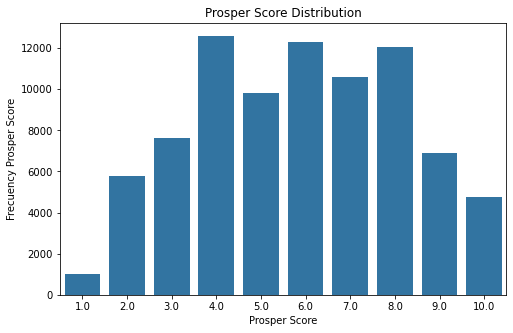

In [9]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=df,x='ProsperScore', color=base_color);
plt.title('Prosper Score Distribution');
plt.xlabel('Prosper Score');
plt.ylabel('Frecuency Prosper Score');

> We can observe a normal distribution

### Other Features

#### Exploration

In [8]:
print(df.describe())

       ProsperScore          Term  BorrowerRate  ListingCategory (numeric)  \
count  83397.000000  83397.000000  83397.000000               83397.000000   
mean       5.861902     42.482248      0.197815                   3.316222   
std        2.300729     11.654919      0.073931                   4.363780   
min        1.000000     12.000000      0.040000                   0.000000   
25%        4.000000     36.000000      0.139600                   1.000000   
50%        6.000000     36.000000      0.189900                   1.000000   
75%        8.000000     60.000000      0.257900                   3.000000   
max       10.000000     60.000000      0.360000                  20.000000   

       EmploymentStatusDuration  TotalProsperPaymentsBilled  \
count              83378.000000                18970.000000   
mean                 102.953189                   24.037375   
std                   97.053398                   19.473783   
min                    0.000000              

#### Operation

##### Generate a on time payment ratio

In [9]:
df['OnTimeRatio'] = df.OnTimeProsperPayments/df.TotalProsperPaymentsBilled
df.OnTimeRatio.describe()

count    18942.000000
mean         0.973458
std          0.091930
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: OnTimeRatio, dtype: float64

##### Add labels to Listing Category

In [10]:
listing_labels = ['Not Available','Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use',
                  'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans',
                  'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation',
                  'Wedding Loans']
l = df['ListingCategory (numeric)'].values
listing =[]
for i in range(len(l)):
    listing.append(listing_labels[l[i]])

df['ListingCategory'] = listing

df.ListingCategory.sample(5)

92800       Home Improvement
875       Debt Consolidation
111986    Debt Consolidation
102970              Vacation
23621     Debt Consolidation
Name: ListingCategory, dtype: object

#### Visualization

##### How Borrower Rate, On Time Ratio and Employment Status Duration are distributed?

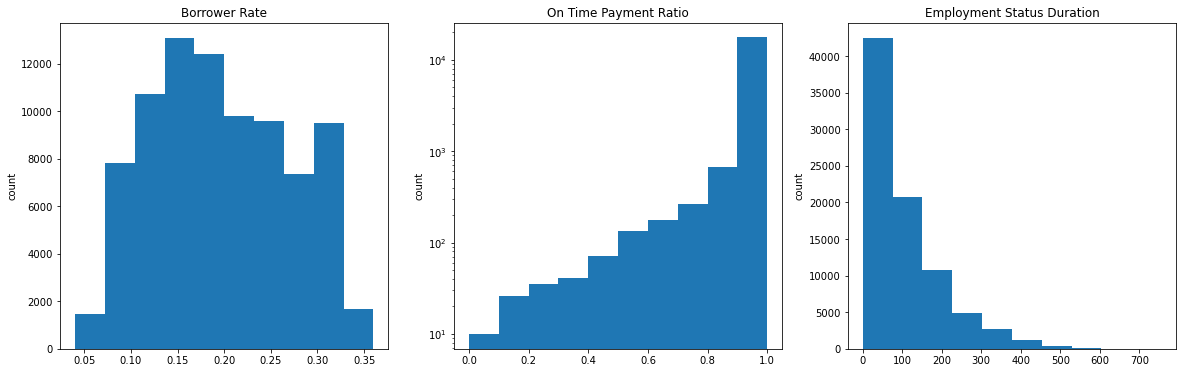

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=False,sharex=False,figsize=(20,6))
ax1.hist(df.BorrowerRate);
ax1.set_title('Borrower Rate');
ax1.set_ylabel('count');
ax2.hist(df.OnTimeRatio);
ax2.set_title('On Time Payment Ratio');
ax2.set_ylabel('count');
ax2.set_yscale('log')
ax3.hist(df.EmploymentStatusDuration);
ax3.set_title('Employment Status Duration');
ax3.set_ylabel('count');

>

#####  How Term is distributed?

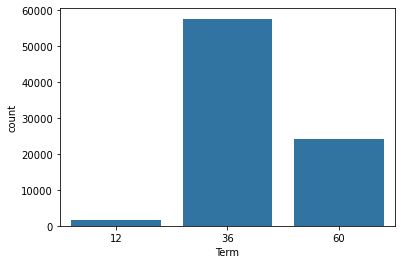

In [14]:
sb.countplot(data=df,x='Term', color=base_color);

> There is a preference for 36 months term. 

##### How Listing Category is distributed?

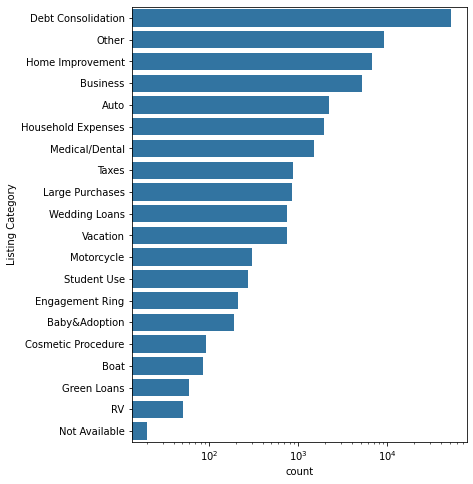

In [15]:
listing_fq = df['ListingCategory'].value_counts().to_frame()

plt.figure(figsize=(6,8))
sb.barplot(data=listing_fq, x='ListingCategory', y=listing_fq.index, color=base_color, ci='sd')
plt.xscale('log');
plt.xlabel('count');
plt.ylabel('Listing Category');

> Debt Consolidation, Home improvement and Business are the top listing categories. Meanwhile Boat, Green Loans and RV the less listed.

##### How Employment Status is distributed?

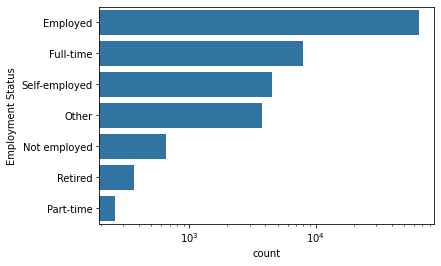

In [16]:
emp_fq = df['EmploymentStatus'].value_counts().to_frame()
sb.barplot(data=emp_fq, x='EmploymentStatus', y=emp_fq.index, color=base_color, ci='sd');
plt.xscale('log');
plt.xlabel('count');
plt.ylabel('Employment Status');

> Employed, full time and part time are the mayority of the people that list for a credit.

##### How Borrower distribute over the States?

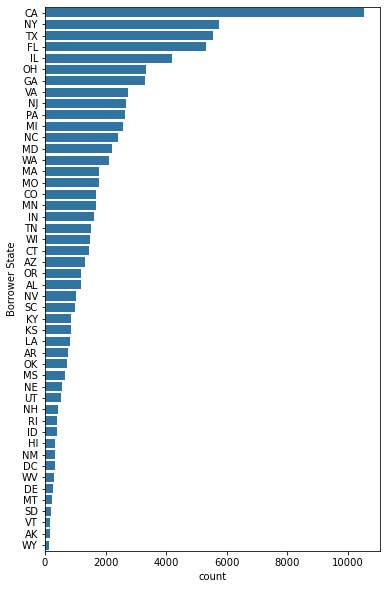

In [17]:
st_fq = df['BorrowerState'].value_counts().to_frame()
plt.figure(figsize=(6,10))
sb.barplot(data=st_fq, x='BorrowerState', y=st_fq.index, color=base_color, ci='sd');
plt.xlabel('count');
plt.ylabel('Borrobwer State');

> CA is were most loans are listed, meanwhile WY is were there are less.

##### How the Occupations are distributed?

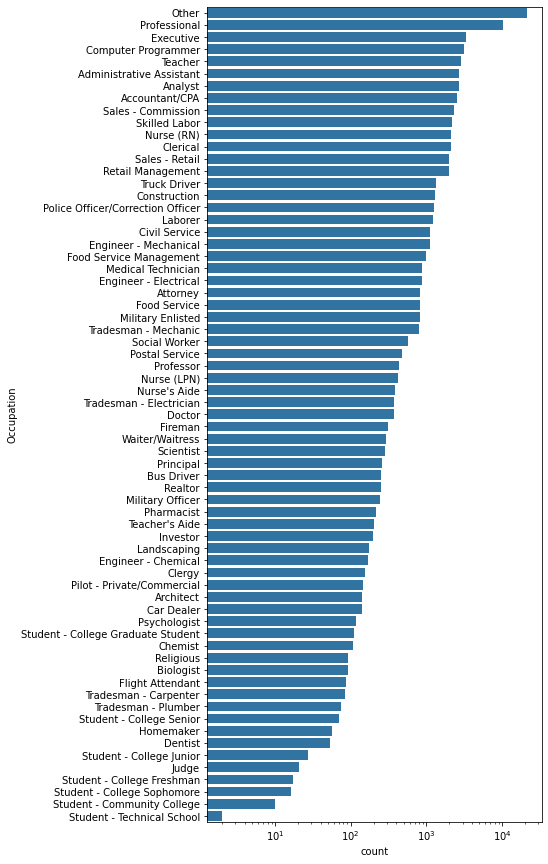

In [18]:
oc_fq = df['Occupation'].value_counts().to_frame()
plt.figure(figsize=(6,15))
sb.barplot(data=oc_fq, x='Occupation', y=oc_fq.index, color=base_color, ci='sd');
plt.xlabel('count');
plt.xscale('log');
plt.ylabel('Occupation')b;

> Most of the borrowers are professionals.

##### How Income Range distribute?

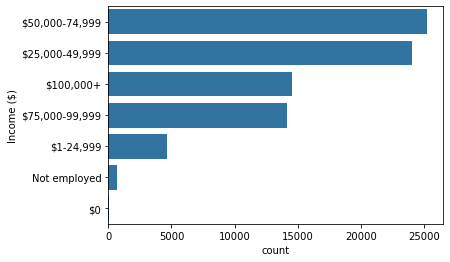

In [19]:
in_fq = df['IncomeRange'].value_counts().to_frame()
sb.barplot(data=in_fq, x='IncomeRange', y=in_fq.index, color=base_color, ci='sd');
plt.xlabel('count');
plt.ylabel('Income ($)');

> Almost have of the borrowers have a income between 25.000 and 75.000 dollars

##### How Income Verifiable is distributed?

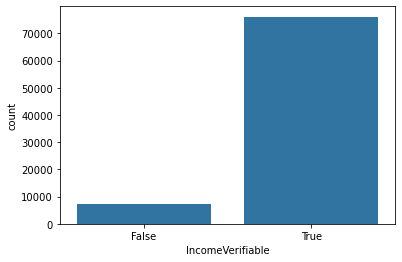

In [20]:
sb.countplot(data=df,x='IncomeVerifiable',color=base_color);

> Most of the borrowers have a verifiable income.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* The variable of interest `ProsperScore` which is a Ordinal data, being 1 the highest risk and 10 the lowest. The distribution could be considered as normal, centred in the middle or to a score 6.
  
* `ProsperScore` has outliers values that correspond to the value of $11$.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

**Operations:**
* `ListingCreationDate` to datetime.
* Select data from after July 2009.
* Created the `OnTimeRatio` from `OnTimeProsperPayments` and `TotalProsperPaymentsBilled`.
* Label `ListingCategory (numeric)` to `ListingCategory`.

**Distributions:**
* `OnTimeRatio` skeewed to the left.
* `EmploymentStatusDuration` skeewed to the rigth.

## Bivariate Exploration


### Main Variable Correlations

#### Code

In [21]:
# Best and worst function
def b_w(df,x,y,n):
    sub = df.groupby(x).mean().sort_values(y,ascending=False).index
    df_1 = df[df[x].isin(sub[:n])]
    df_2 = df[df[x].isin(sub[-n:])]
    
    base_color = sb.color_palette()[0]
    plt.figure(figsize=(6,10))
    ticks = np.arange(0,df[y].max()+1,df[y].max()/10)
    
    plt.subplot(211);
    plt.title('Highest {}'.format(n));
    plt.xlim((df[y].min(),df[y].max()));
    sb.barplot(data=df_1, x=y, y=x, color=base_color, order=sub[:n], ci='sd');
    
    plt.subplot(212);
    plt.title('Lowest {}'.format(n));
    plt.xlim((df[y].min(),df[y].max()));
    sb.barplot(data=df_2, x=y, y=x, color=base_color, order=sub[-n:], ci='sd');

#### Visualization

##### How Employmnet Status relate with  the Average Prosper Score?

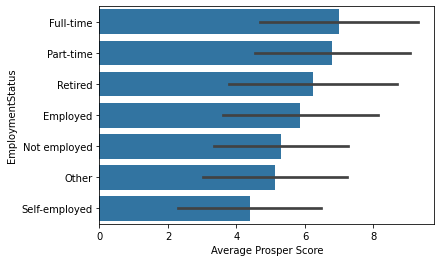

In [22]:
df_sub = df.groupby('EmploymentStatus').mean()
score_order = df_sub.sort_values('ProsperScore',ascending=False).index
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'ProsperScore', y = 'EmploymentStatus',
            color = base_color, order = score_order, ci = 'sd');
plt.xlabel('Average Prosper Score');

> Full-time and Part-time employees have a better ProsperScore than the not employed or self employed people.

##### How Income Range relate with the Average Prosper Score?

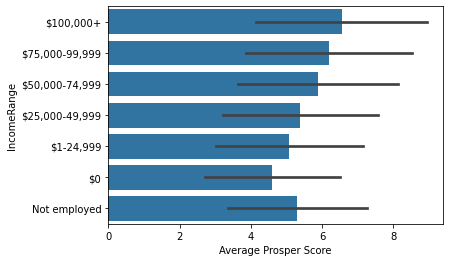

In [23]:
df_sub = df.groupby('IncomeRange').mean()
order_income = ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not employed']
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'ProsperScore', y = 'IncomeRange',
            color = base_color, order = order_income, ci = 'sd');
plt.xlabel('Average Prosper Score');

> We observe a positive correlation between the income and the prosper score.

##### How Borrower Rate / On Time Ratio / Employment Status Duration relate with Prosper Score?

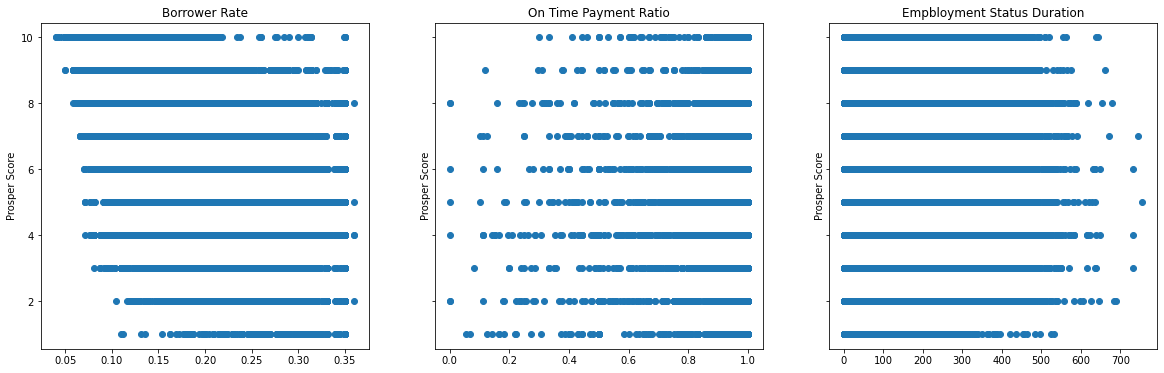

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,sharex=False,figsize=(20,6))
ax1.scatter(df.BorrowerRate,df.ProsperScore);
ax1.set_title('Borrower Rate');
ax1.set_ylabel('Prosper Score');
ax2.scatter(df.OnTimeRatio,df.ProsperScore);
ax2.set_title('On Time Payment Ratio');
ax2.set_ylabel('Prosper Score');
ax3.scatter(df.EmploymentStatusDuration,df.ProsperScore);
ax3.set_title('Empbloyment Status Duration');
ax3.set_ylabel('Prosper Score');

> BorrowerRate presents a negative correlation with the ProsperScore. Meanwhile the features of OnTimeRatio and EmploymentStatusDuration doesn't show any relation with the prosper score.

##### How Listing Category relate with Prosper Score? 

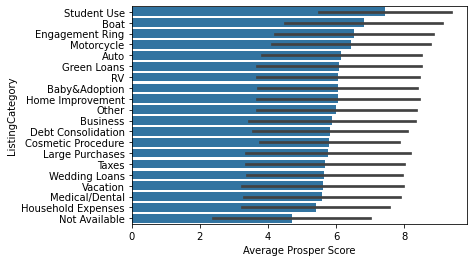

In [25]:
df_sub = df.groupby('ListingCategory').mean()
score_order = df_sub.sort_values('ProsperScore',ascending=False).index
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'ProsperScore', y = 'ListingCategory',
            color = base_color, order = score_order, ci = 'sd');
plt.xlabel('Average Prosper Score');

> The Student Use objetive has the highest average prosper score, followed by Boat, Engagement Ring and Motorcycle , and Household Expenses is the worst.

##### How Income Verifiable relate with Prosper Score?

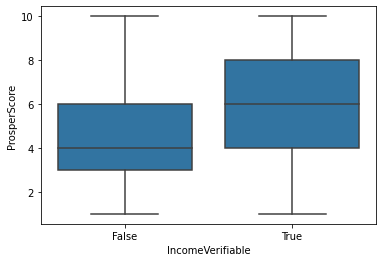

In [26]:
sb.boxplot(data=df, y='ProsperScore', x='IncomeVerifiable', color=base_color);

> Not verifiying the income has a negative impact on the ProsperScore. 

##### How Term relate with Prosper Score?

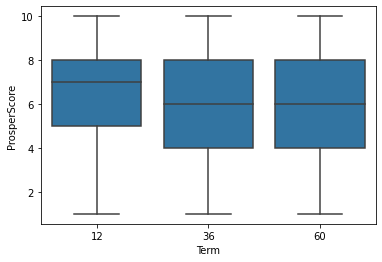

In [27]:
sb.boxplot(data=df, y='ProsperScore', x='Term', color=base_color);

> 12 months terms has a better ProsperScore average.

##### How the Borrower States relate with the Average Prosper Score?

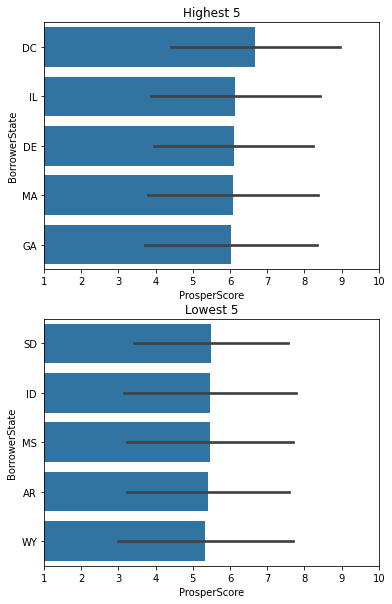

In [28]:
b_w(df,'BorrowerState','ProsperScore',5)

> The State has an impact on the average of the ProsperScore, where DC is the best scored and WY the worst.

##### How the Occupations relate with the Average Prosper Score?

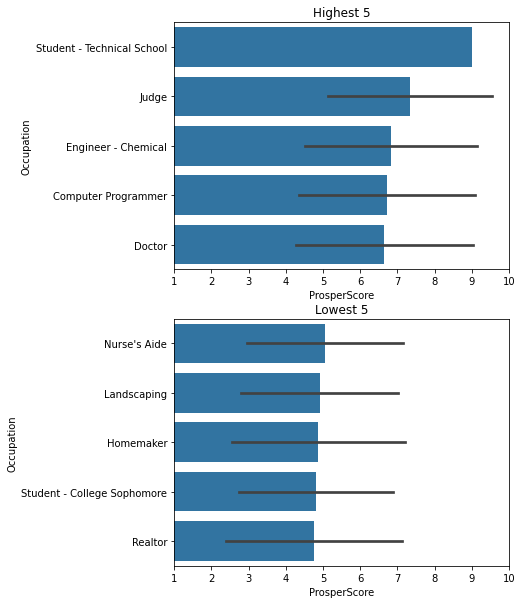

In [29]:
b_w(df,'Occupation','ProsperScore',5)

> Occupations like Student - Technical School, Judge and Engineer - Chemical had a better ProsperScore average and, Realtor has the worst

### Other Correlations

#### Visualization

##### How the Borrower States relate with the Average Borrower Rate?

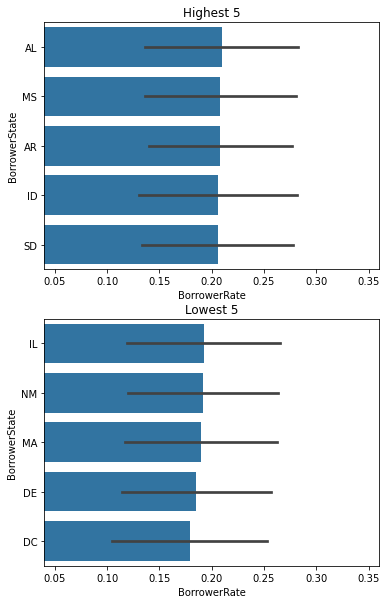

In [30]:
b_w(df,'BorrowerState','BorrowerRate',5)

> The average borrowing rate deppends on the State, with highest rates for AL and the lowest for DC.

##### How the Occupations relate with the Average Borrower Rate?

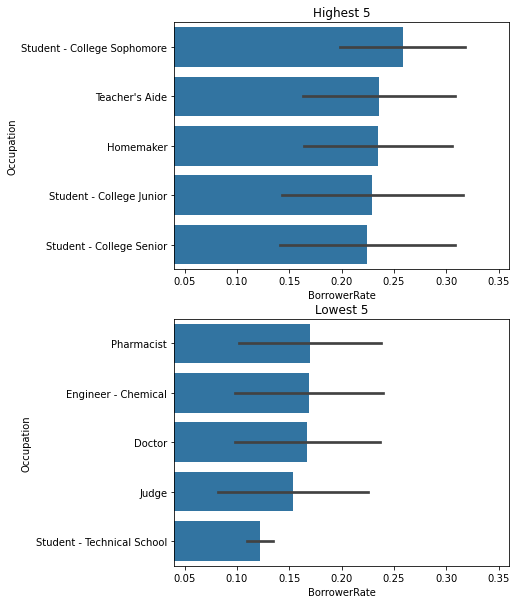

In [31]:
b_w(df,'Occupation','BorrowerRate',5)

> Student - Technical School, Judge and Doctor had the better average of BorrowerRate and, Student - College Sophomore, Teacher's Aide and Homemaker the worst rate.

##### How the Income relate to the Average Prosper Score?

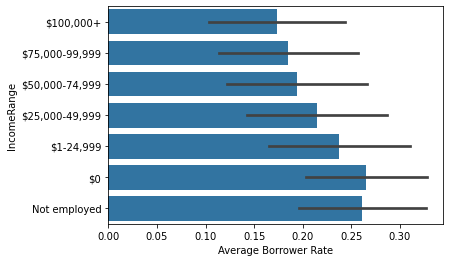

In [32]:
df_sub = df.groupby('IncomeRange').mean()
order_income = ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not employed']
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'BorrowerRate', y = 'IncomeRange',
            color = base_color, order = order_income, ci = 'sd');
plt.xlabel('Average Borrower Rate');

> The income is negatively correlated to the BorrowerRate.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Some of the features show some relation with the main variable. For example:
* The **Full-time** and **Part-time** employees have a better `ProsperScore` than the not employed or self employed people.
* `IncomeRange` is directly proportional to `ProsperScore`.
* `BorrowerRate` presents a inverse relation with the `ProsperScore`.
* Features like `OnTimeRatio` and `EmploymentStatusDuration` doesn't show a relation with the prosper score.
* The **Student Use** objetive has the highest average prosper score, followed by **Boat**, **Engagement Ring** and **Motorcycle** , and **Household Expenses** is the worst.
* Not verifiying the income has a negative impact on the `ProsperScore`.
* 12 months terms has a better `ProsperScore` average.
* The State has an impact on the average of the `ProsperScore`.
* Occupations like **Student - Technical School**, **Judge** and **Engineer - Chemical** had a better `ProsperScore` average and, **Realtor** has the worst.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* The average borrowing rate deppends on the State, with highest rates for **AL** and the lowest for **DC**.
* **Student - Technical School**, **Judge** and **Doctor** had the better average of `BorrowerRate` and, **Student - College Sophomore**, **Teacher's Aide** and **Homemaker** the worst rate.
* `IncomeRange` negatively correlated to `BorrowerRate`.

## Multivariate Exploration


##### How Employment Status, Prosper Score and Term relate to each other?

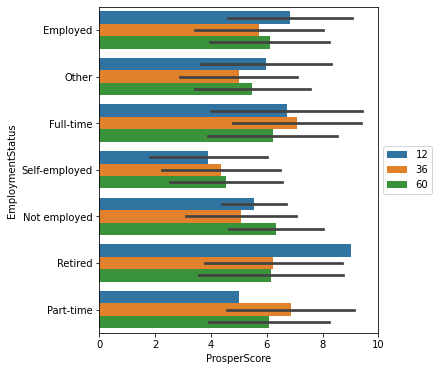

In [33]:
plt.figure(figsize=(5,6));
sb.barplot(data=df, y='EmploymentStatus', x='ProsperScore', hue='Term', ci='sd');
plt.xlim(0,10)
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

> There is no clear relationship between Term, EmploymentStatus and ProsperScore.

##### How Prosper Score relate with Borrower Rate considering the top and worst Occupations?

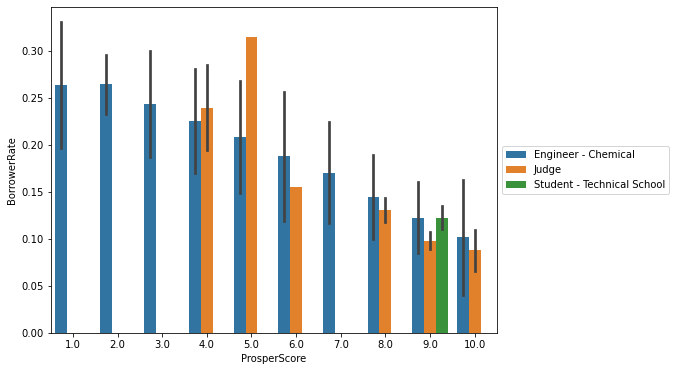

In [34]:
occ_1 = ['Student - Technical School', 'Judge', 'Engineer - Chemical']
s_df = df[df['Occupation'].isin(occ_1)]

plt.figure(figsize=(8,6));
plt.xlim(0,10);
sb.barplot(data=s_df, y='BorrowerRate', x='ProsperScore', hue='Occupation', ci='sd');
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

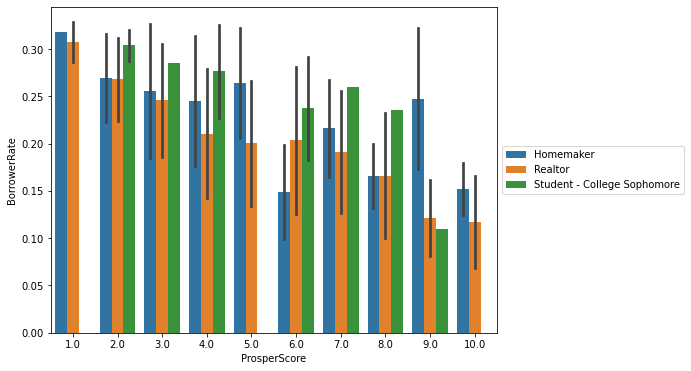

In [36]:
occ_2 = ['Homemaker', 'Student - College Sophomore', 'Realtor']
s_df2 = df[df['Occupation'].isin(occ_2)]

plt.figure(figsize=(8,6));
plt.xlim(0,10);
sb.barplot(data=s_df2, y='BorrowerRate', x='ProsperScore', hue='Occupation', ci='sd');
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

> There is a clear relationship between the BorrowerRate, ProsperScore and Occupation, where the Occupation is strengthed by the BorrowerRate. This relationship is less clear to Homemakers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* There is no clear relationship between `Term`, `EmploymentStatus` and `ProsperScore`.
* There is a clear relationship between the `BorrowerRate`, `ProsperScore` and `Occupation`, where the `Occupation` is strengthed by the `BorrowerRate`.


### Were there any interesting or surprising interactions between features?
* **Homemaker** is the only ocuppation showed that has not a clear relationship between `BorrowerRate` and `ProsperScore`.


## Conclusions
From a database with 113,937 loans with 81 variables, we expect to get the relationship between the variables and the risk of the loan, represented by the `ProsperScore`. For witch we consider the following features `Term`, `BorrowerRate`, `ListingCategory`, `EmploymnetStatus`, `EmploymnetStatusDuration`, `BorrowerState`, `Occupation`, `IncomeRange`, `IncomeVerifiable` and `OnTimeRatio`. The last one correspond to the relation between `TotalProsperPaymentsBilled` and `OnTimeProsperPayments`, in order to see the how responsable has been the borrower in other loans.

Taking all said before in consideration, we can conclude the following:
* The income is positively correlated to the prosper score.
* The borrower rate is negatively correlated to the prosper score.
* Impressively the on time payment ratio from past loans and the emplyment duration of the borrower had no relationship with the prosper score. This could be related to the distribution of these features, where on time payment the ratio is skeewed to the left, while employment duration is skeewed to the left.
* Verifiying the income has a positive impact in the prosper score.
* Employed people has a better prosper score.
* 12 months terms has better prosper scores.
* The better listed category is **Student Use**.
* Not all the states have the same borring rate. **DC** has the lowest, meanwhile **AL** the highest.
* The occupation strength the relation between the borrower rate and the prosper score.

In summary, the variables that make a borrower less risky are the following:
* High income
* Studies listing category
* Low interest rate
* Verified income
* 12 month term

Also, in time payments of past loans doesn't correlate with the borrower risk.